In [13]:
import pandas as pd
import gzip
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [5]:
counts_path = "/Users/ut-ashiki/Engineer/workspace/agiats/impossible_inherent_entropy/results/100M_samples/PCFG/sentence_counts.gz"
with gzip.open(counts_path, "rt") as f:
    counts = pd.read_csv(f, sep="\t", header=None, names=["sentence", "count"])

In [14]:
counts['count'].value_counts().sort_index()

count
1        70364327
2         1512844
3          880180
4          559285
5          312628
6          164016
7           87426
8           49156
9           28671
10          16472
11           9122
12           4875
13           2710
14           1517
15            819
16            553
17            386
18            191
19            175
20             72
21             44
22             40
23             10
24              9
25              8
26              6
27              4
28              2
29              2
30              2
31              1
32              1
49              1
50              1
54              1
56              1
57              4
58              3
59              4
60              4
61             10
62             14
63             20
64             16
65             28
66             35
67             64
68             53
69             76
70             86
71             88
72            122
73            130
74            170
75            204
76  

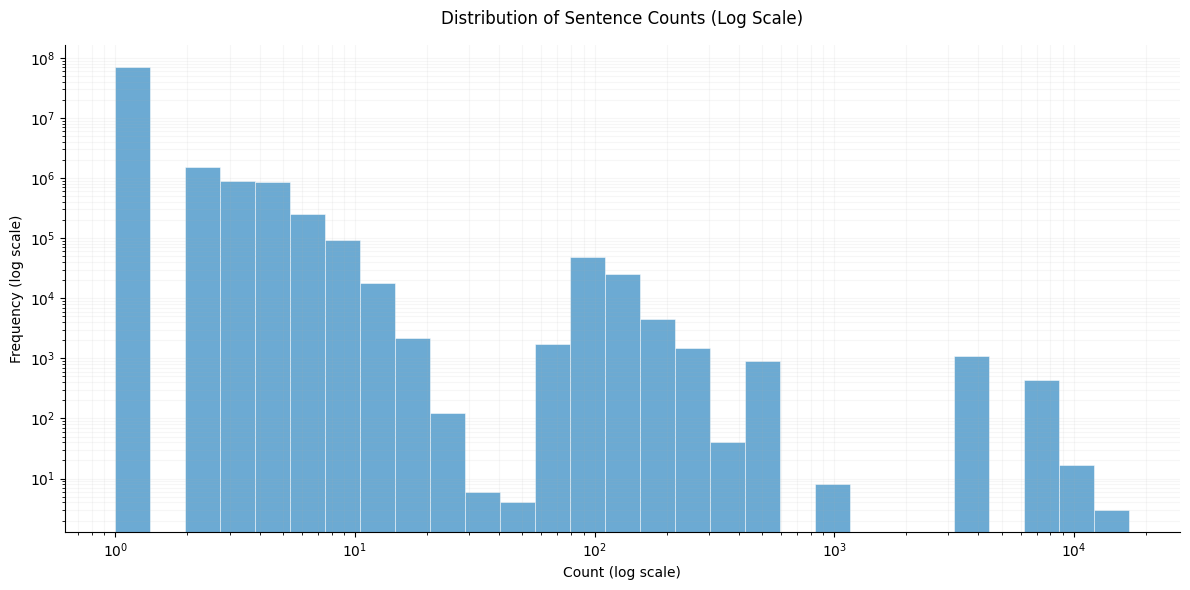

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# プロットのスタイル設定
plt.figure(figsize=(12, 6))

# ヒストグラムを作成（両対数スケール）
# binsを調整して、データの分布をより自然に表示
bins = np.logspace(np.log10(counts['count'].min()),
                   np.log10(counts['count'].max()),
                   num=30)  # ビンの数を30に調整

plt.hist(counts['count'], bins=bins, log=True,
         alpha=0.7,  # 透明度を少し上げる
         color='#2E86C1',  # より落ち着いた青色
         edgecolor='white',  # 白い枠線
         linewidth=0.5)  # 枠線を細く
plt.xscale('log')

# グラフの設定
plt.title('Distribution of Sentence Counts (Log Scale)', fontsize=12, pad=15)
plt.xlabel('Count (log scale)', fontsize=10)
plt.ylabel('Frequency (log scale)', fontsize=10)
plt.grid(True, which="both", ls="-", alpha=0.1)  # グリッドを薄く

# 軸の設定を調整
plt.gca().spines['top'].set_visible(False)  # 上の枠線を消す
plt.gca().spines['right'].set_visible(False)  # 右の枠線を消す

# グラフを表示
plt.tight_layout()
plt.show()

In [25]:
sample_size = 100_000_000
sanity_check_path = "/Users/ut-ashiki/Engineer/workspace/agiats/impossible_inherent_entropy/results/100M_samples/PCFG/sanity_check_sample_10K.csv"
data = pd.read_csv(sanity_check_path)
data['monte-carlo_prob'] = data['count'] / sample_size

In [51]:
# KL divergence
import numpy as np
from scipy.stats import entropy

# Uniform distribution baseline
uniform_prob = np.full(len(data), 1 / len(data))
kl_div_uniform = entropy(data['true_prob'], uniform_prob)

# Zipf distribution baseline
n = len(data)
zipf_prob = 1 / (np.arange(1, n + 1) * np.sum(1 / np.arange(1, n + 1)))
kl_div_zipf = entropy(data['true_prob'], zipf_prob)

# Exponential distribution baseline
exp_prob = np.exp(-np.arange(n))
exp_prob = exp_prob / np.sum(exp_prob)  # Normalize
kl_div_exp = entropy(data['true_prob'], exp_prob)

# Monte Carlo estimation
kl_div_monte_carlo = entropy(data['true_prob'], data['monte-carlo_prob'])

print(f"KL Divergence (Uniform baseline): {kl_div_uniform:.6f}")
print(f"KL Divergence (Zipf baseline): {kl_div_zipf:.6f}")
print(f"KL Divergence (Exponential baseline): {kl_div_exp:.6f}")
print(f"KL Divergence (Monte Carlo): {kl_div_monte_carlo:.6f}")

KL Divergence (Uniform baseline): 2.420895
KL Divergence (Zipf baseline): 3.440173
KL Divergence (Exponential baseline): 169.201020
KL Divergence (Monte Carlo): 1.671520


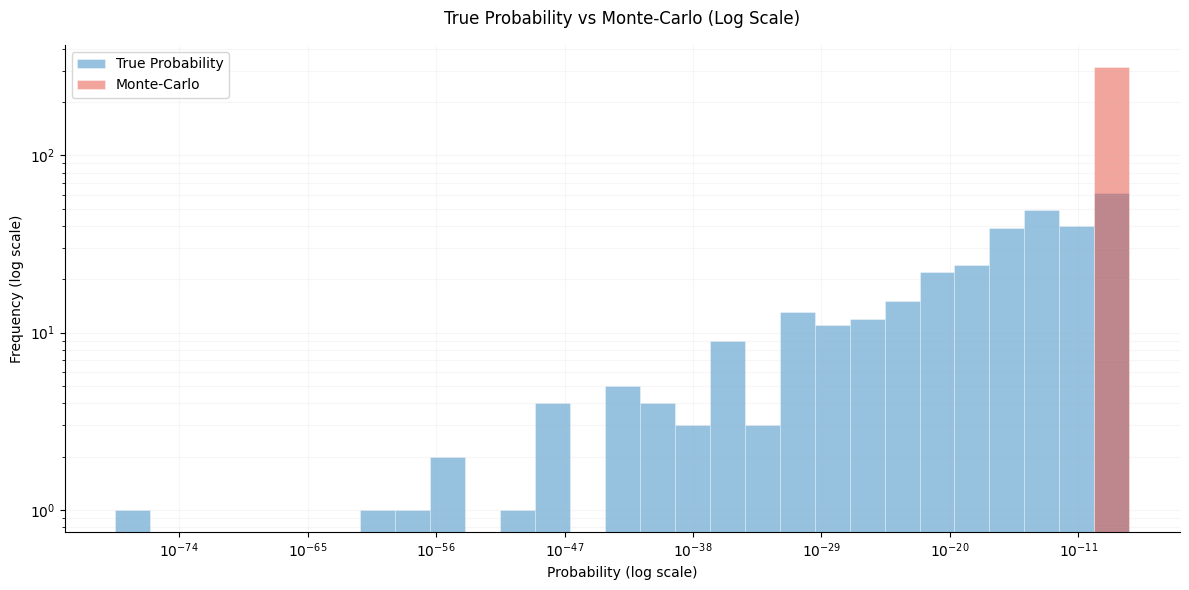

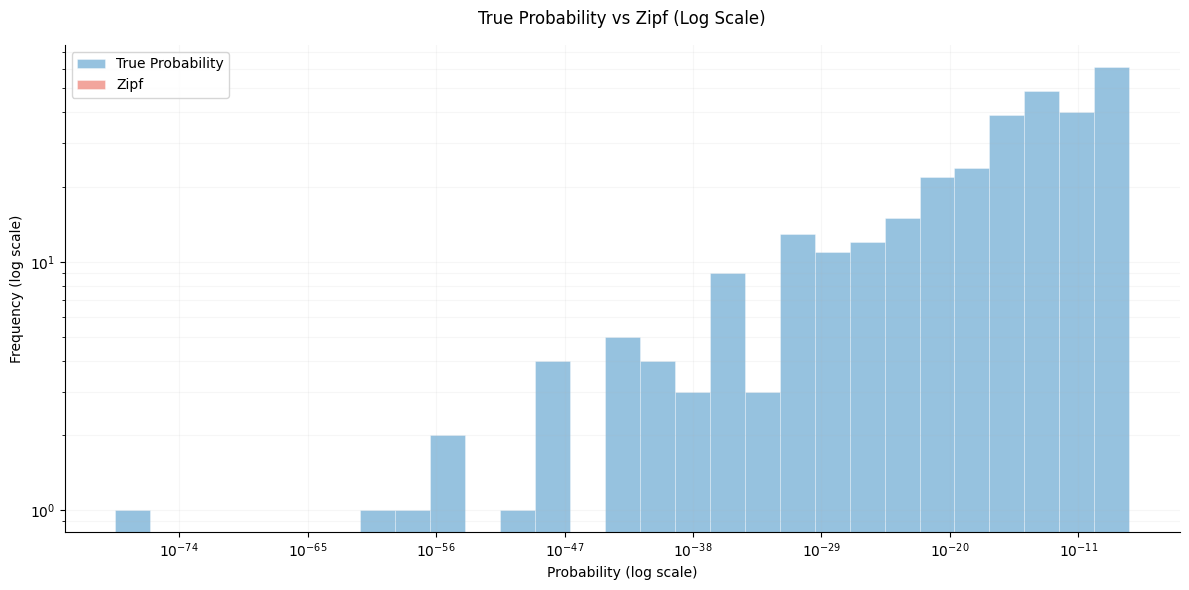

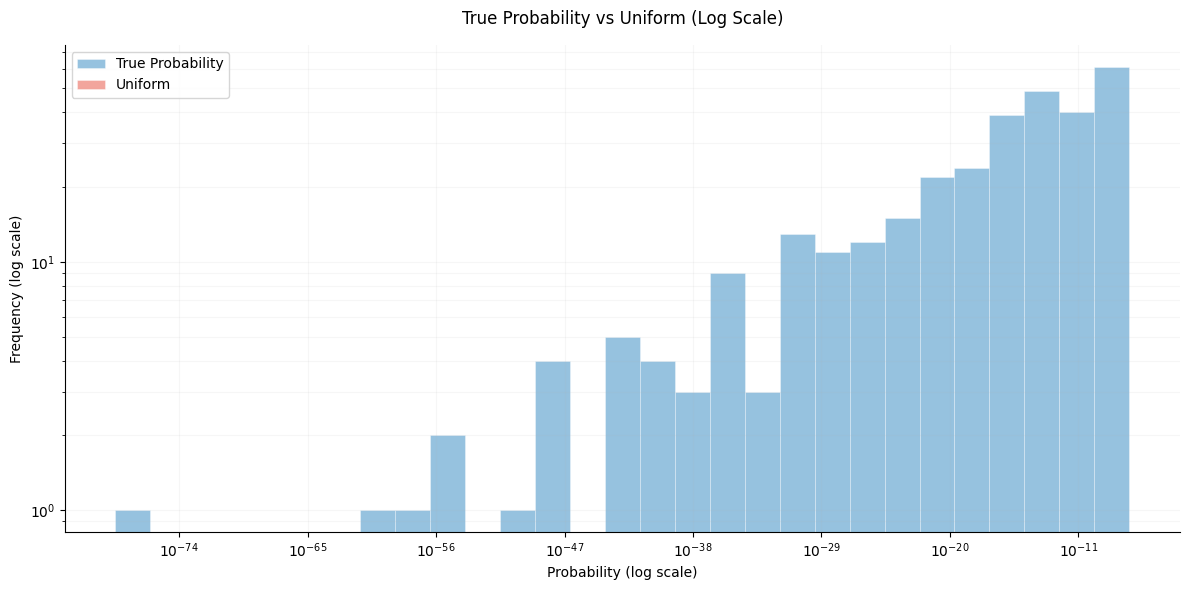

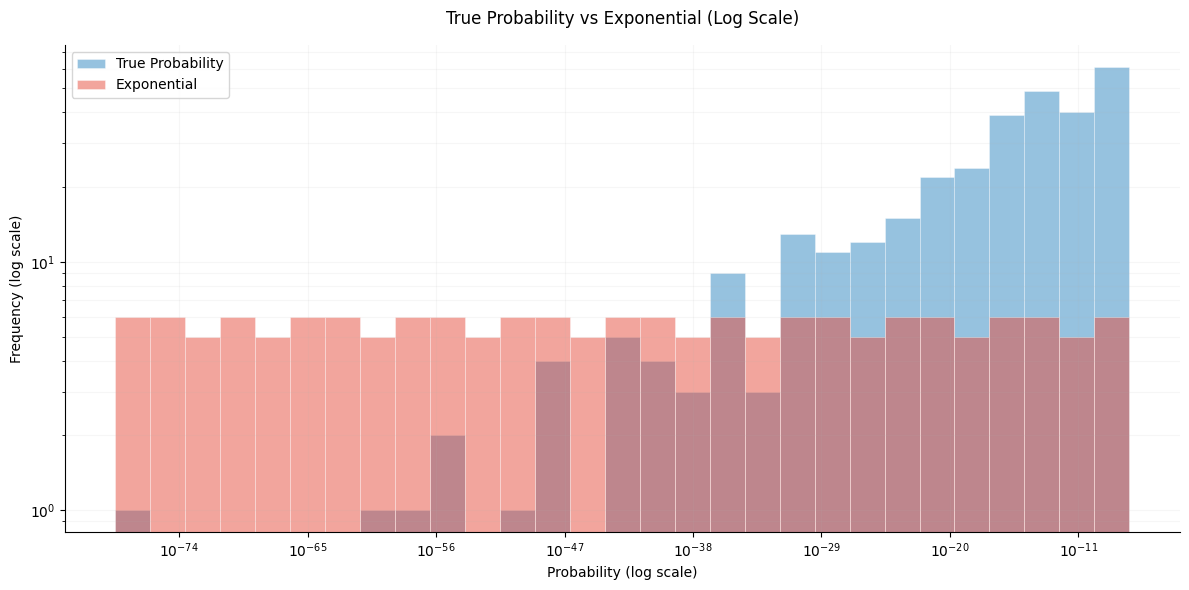

In [48]:
def plot_probability_distributions(data, comparison_name, comparison_prob, figsize=(12, 6)):
    """
    Plot true probability distribution with one comparison distribution

    Args:
        data (pd.DataFrame): DataFrame containing true_prob
        comparison_name (str): Name of the comparison distribution
        comparison_prob (np.array): Probability values of the comparison distribution
        figsize (tuple): Figure size
    """
    plt.figure(figsize=figsize)

    # Create bins for histogram
    bins = np.logspace(np.log10(data['true_prob'].min()),
                      np.log10(data['true_prob'].max()),
                      num=30)

    # Plot both distributions
    plt.hist(data['true_prob'], bins=bins, log=True,
            alpha=0.5, color='#2E86C1',
            edgecolor='white', linewidth=0.5,
            label='True Probability')

    plt.hist(comparison_prob, bins=bins, log=True,
            alpha=0.5, color='#E74C3C',
            edgecolor='white', linewidth=0.5,
            label=comparison_name)

    plt.xscale('log')
    plt.title(f'True Probability vs {comparison_name} (Log Scale)', fontsize=12, pad=15)
    plt.xlabel('Probability (log scale)', fontsize=10)
    plt.ylabel('Frequency (log scale)', fontsize=10)
    plt.legend()
    plt.grid(True, which="both", ls="-", alpha=0.1)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()


plot_probability_distributions(data, "Monte-Carlo", data['monte-carlo_prob'])


plot_probability_distributions(data, "Zipf", zipf_prob)


plot_probability_distributions(data, "Uniform", uniform_prob)


plot_probability_distributions(data, "Exponential", exp_prob)